In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict as dd
from tqdm import tqdm
import pickle
import json

# Sample games

In [2]:
games_list = os.listdir('../presentables/raw_predicted_scores/')

In [3]:
year = 2024
sqrt_mean_squared_error = 0.087452

In [4]:
all_games_player_distributions = dict()
games_list = [game for game in games_list if game.startswith(str(year))]

In [5]:
train_data = pd.read_csv('../data/curated/modelling/graph_train.csv')

with open('../models/feature_importance_ordering.pickle', 'rb') as f:
    feature_importance_ordering = pickle.load(f)

In [6]:
X = train_data[list(list(feature_importance_ordering.keys())[-1])].values

In [7]:
np.random.seed(0)
n_samples = 50000

all_games_simulation = dd(dict)

number_of_games = 0
for game_filename in tqdm(games_list):

    # read in predicted scores
    predicted_game = pd.read_csv(
        f'../presentables/raw_predicted_scores/{game_filename}')

    round_number = game_filename.split('_')[1].split('.')[0]
    team1 = game_filename.split('_')[2].split('v')[0].strip()
    team2 = game_filename.split('v')[1].split('.')[0].strip()

    game_features = pd.read_csv(
        f'../future data/curated/NormalisedData/{year} Round {round_number.strip("round")} {team1} v {team2}  (N).csv')

    x = game_features[list(
        list(feature_importance_ordering.keys())[-1])].values

    diag = np.diag(x @ np.linalg.inv(np.transpose(X) @ X) @ np.transpose(x))

    # simulate game
    n_players = len(predicted_game)
    predicted_scores = predicted_game['predicted_score']
    players = predicted_game['player']

    # simulate the samples
    epsilon = np.random.normal(0, 1, n_players*n_samples)

    all_games_simulation[round_number][team1 + ' v ' + team2] = dict()

    for i in range(n_samples):
        sampled_game_score = predicted_scores + \
            epsilon[i*n_players:(i+1)*n_players] * \
            sqrt_mean_squared_error * np.sqrt(1+diag)
        sampled_game_score.sort_values(ascending=False, inplace=True)

        sampled_player_rank = [players[i] for i in sampled_game_score.index]

        all_games_simulation[round_number][team1 +
                                           ' v ' + team2][i] = sampled_player_rank

 44%|████▍     | 91/207 [22:22<34:51, 18.03s/it]

In [ ]:
with open(f'../presentables/{year}_simulated_games.json', 'w') as f:
    json.dump(all_games_simulation, f)

In [ ]:
year = 2023

np.random.seed(0)
n_samples = 50000

all_games_simulation_2023 = dd(dict)

number_of_games = 0
for game_filename in tqdm(games_list):

    # read in predicted scores
    predicted_game = pd.read_csv(
        f'../presentables/raw_predicted_scores/{game_filename}')

    round_number = game_filename.split('_')[1].split('.')[0]
    team1 = game_filename.split('_')[2].split('v')[0].strip()
    team2 = game_filename.split('v')[1].split('.')[0].strip()

    game_features = pd.read_csv(
        f'../data/curated/NormalisedData/{year} Round {round_number.strip("round")} {team1} v {team2}  (N).csv')

    x = game_features[list(
        list(feature_importance_ordering.keys())[-1])].values

    diag = np.diag(x @ np.linalg.inv(np.transpose(X) @ X) @ np.transpose(x))

    # simulate game
    n_players = len(predicted_game)
    predicted_scores = predicted_game['predicted_score']
    players = predicted_game['player']

    # simulate the samples
    epsilon = np.random.normal(0, 1, n_players*n_samples)

    all_games_simulation_2023[round_number][team1 + ' v ' + team2] = dict()

    for i in range(n_samples):
        sampled_game_score = predicted_scores + \
            epsilon[i*n_players:(i+1)*n_players] * \
            sqrt_mean_squared_error * np.sqrt(1+diag)
        sampled_game_score.sort_values(ascending=False, inplace=True)

        sampled_player_rank = [players[i] for i in sampled_game_score.index]

        all_games_simulation_2023[round_number][team1 +
                                           ' v ' + team2][i] = sampled_player_rank
        
with open(f'../presentables/{year}_simulated_games.json', 'w') as f:
    json.dump(all_games_simulation_2023, f)

**Research: prob convergence**

Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.5 after 10 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.44 after 100 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.426 after 1000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4472 after 10000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4502 after 20000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4518 after 30000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.4509 after 40000 samples
Probability of Nick Daicos being the top player in Carlton v Collingwood is 0.45106 after 50000 samples


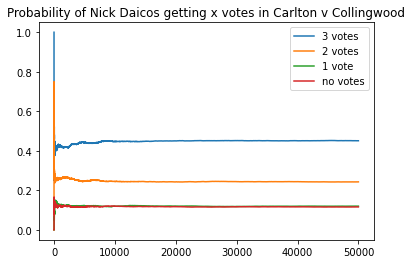

Probability of Jack Steele being the top player in Richmond v StKilda is 0.5 after 10 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.35 after 100 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.331 after 1000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.3033 after 10000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.3022 after 20000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.2981333333333333 after 30000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.298475 after 40000 samples
Probability of Jack Steele being the top player in Richmond v StKilda is 0.29778 after 50000 samples


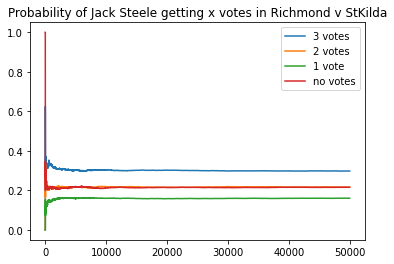

Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.5 after 10 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.44 after 100 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.379 after 1000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.3901 after 10000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.3883 after 20000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.3905 after 30000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.3889 after 40000 samples
Probability of Marcus Bontempelli being the top player in WesternBulldogs v GoldCoast is 0.38954 after 50000 samples


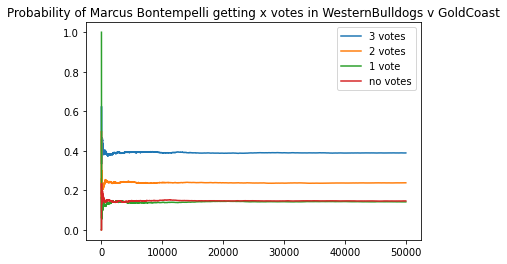

Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.3 after 10 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.35 after 100 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.37 after 1000 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.3492 after 10000 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.35265 after 20000 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.3516 after 30000 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.3529 after 40000 samples
Probability of Jai Newcombe being the top player in Hawthorn v Richmond is 0.35368 after 50000 samples


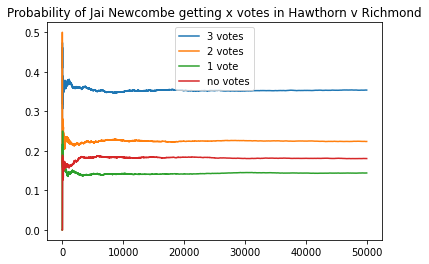

Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.4 after 10 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.36 after 100 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.284 after 1000 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.2689 after 10000 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.27085 after 20000 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.27086666666666664 after 30000 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.27005 after 40000 samples
Probability of Luke D-Uniacke being the top player in Melbourne v NorthMelbourne is 0.26986 after 50000 samples


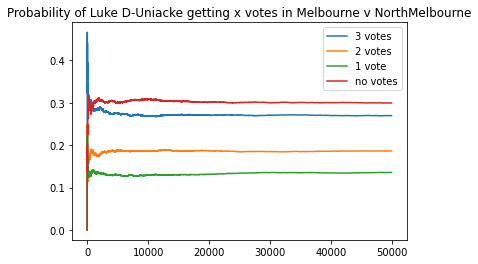

Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.4 after 10 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.25 after 100 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.239 after 1000 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.2421 after 10000 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.2433 after 20000 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.24136666666666667 after 30000 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.242175 after 40000 samples
Probability of Darcy Fogarty being the top player in Adelaide v WesternBulldogs is 0.2423 after 50000 samples


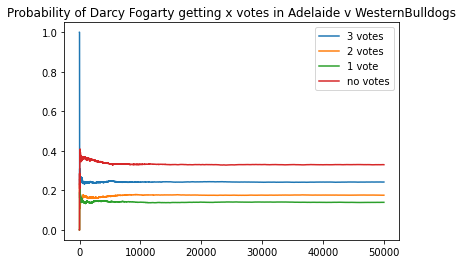

In [8]:
def simulation_stability(round_number, team1, team2, player, n_samples, all_games_simulation, **kwargs):

    player_prob = dd(list)

    total = dd(int)

    for i in range(n_samples):
        for j in range(3):
            total[j] += bool(all_games_simulation[round_number][team1 +
                                                                ' v ' + team2][i].index(player) == j)
        total[3] += bool(all_games_simulation[round_number][team1 +
                                                            ' v ' + team2][i].index(player) > 3)

        for j in range(4):
            player_prob[j].append(total[j]/(i+1))

        if i in [9, 99, 999, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999]:
            print(
                f'Probability of {player} being the top player in {team1} v {team2} is {total[0]/(i+1)} after {i+1} samples')

    plt.title(
        f'Probability of {player} getting x votes in {team1} v {team2}')

    for j in range(4):
        plt.plot(player_prob[j])
        plt.legend(['3 votes', '2 votes', '1 vote', 'no votes'])
    plt.show()


for round in all_games_simulation:

    for game in all_games_simulation[round]:

        data = pd.read_csv(
            f'../presentables/raw_predicted_scores/{year}_{round}_{game}.csv')

        simulation_stability(round, game.split(' v ')[0], game.split(
            ' v ')[1], data.loc[0, 'player'], n_samples, all_games_simulation)

# Collect person prob

In [9]:
leaderboard = pd.read_csv('../presentables/leaderboard.csv')
interested_players = leaderboard['Player'].head(50).tolist()

In [10]:
all_games_player_distributions = dd(dict)

for round in tqdm(all_games_simulation):

    for game in all_games_simulation[round]:

        # indep distribution
        all_games_player_distributions[round][game] = dd(list)

        for player in all_games_simulation[round][game][0]:

            if player not in interested_players:  # get independent distribution
                player_distribution = {i: 0 for i in range(4)}

                for i in range(n_samples):
                    rank = all_games_simulation[round][game][i].index(player)
                    rank = rank if rank < 3 else 3
                    player_distribution[3-rank] += 1

                for i in range(4):
                    player_distribution[i] /= n_samples

                all_games_player_distributions[round][game][player] = player_distribution

        # joint distribution
        game_interested_players_index = {}
        n = 0
        for player in all_games_simulation[round][game][0]:
            if player in interested_players:
                game_interested_players_index[player] = n
                n += 1

        players_distribution = dd(int)
        for i in range(n_samples):
            combo = []
            for player in game_interested_players_index:
                rank = all_games_simulation[round][game][i].index(player)
                rank = rank if rank < 3 else 3
                combo.append((player, 3-rank))
            players_distribution[tuple(combo)] += 1
        for combo in players_distribution:
            players_distribution[combo] /= n_samples

        all_games_player_distributions[round][game]['joint'] = players_distribution

100%|██████████| 6/6 [00:12<00:00,  2.13s/it]


**Research: Joint distribution stability**

Probability of being the first combo in Carlton v Collingwood is 0.1 after 10 samples, 8 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.01 after 100 samples, 35 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.004 after 1000 samples, 84 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.0047 after 10000 samples, 113 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.0039 after 20000 samples, 124 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.0034666666666666665 after 30000 samples, 128 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.003325 after 40000 samples, 132 pos prob instances, 7
Probability of being the first combo in Carlton v Collingwood is 0.00334 after 50000 samples, 132 pos prob instances, 7


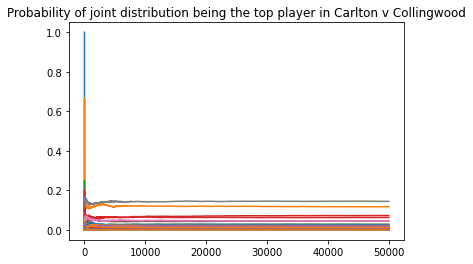

Probability of being the first combo in Richmond v StKilda is 0.1 after 10 samples, 8 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.06 after 100 samples, 29 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.05 after 1000 samples, 34 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.0587 after 10000 samples, 34 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.0565 after 20000 samples, 34 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.0562 after 30000 samples, 34 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.055775 after 40000 samples, 34 pos prob instances, 3
Probability of being the first combo in Richmond v StKilda is 0.05526 after 50000 samples, 34 pos prob instances, 3


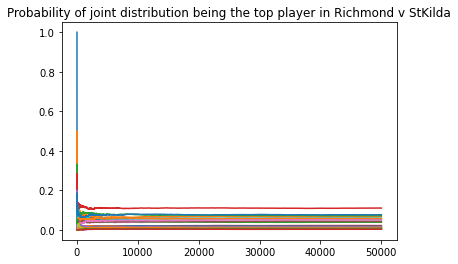

Probability of being the first combo in WesternBulldogs v GoldCoast is 0.1 after 10 samples, 6 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.07 after 100 samples, 14 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.117 after 1000 samples, 40 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.1205 after 10000 samples, 63 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.1242 after 20000 samples, 79 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.12203333333333333 after 30000 samples, 85 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.12285 after 40000 samples, 87 pos prob instances, 5
Probability of being the first combo in WesternBulldogs v GoldCoast is 0.12108 after 50000 samples, 93 pos prob instances, 5


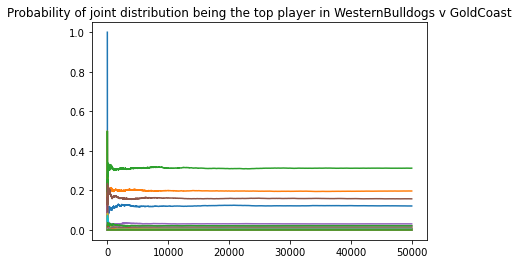

Probability of being the first combo in Hawthorn v Richmond is 0.1 after 10 samples, 7 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.02 after 100 samples, 13 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.045 after 1000 samples, 13 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.0513 after 10000 samples, 13 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.0507 after 20000 samples, 13 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.0483 after 30000 samples, 13 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.0474 after 40000 samples, 13 pos prob instances, 2
Probability of being the first combo in Hawthorn v Richmond is 0.04736 after 50000 samples, 13 pos prob instances, 2


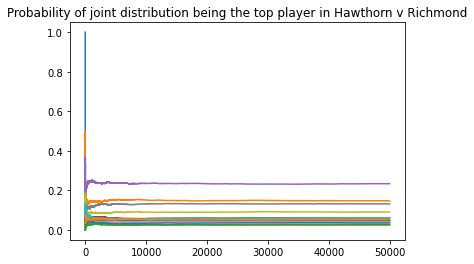

Probability of being the first combo in Melbourne v NorthMelbourne is 0.1 after 10 samples, 8 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.05 after 100 samples, 38 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.054 after 1000 samples, 70 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.0555 after 10000 samples, 73 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.054 after 20000 samples, 73 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.0537 after 30000 samples, 73 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.0545 after 40000 samples, 73 pos prob instances, 4
Probability of being the first combo in Melbourne v NorthMelbourne is 0.05504 after 50000 samples, 73 pos prob instances, 4


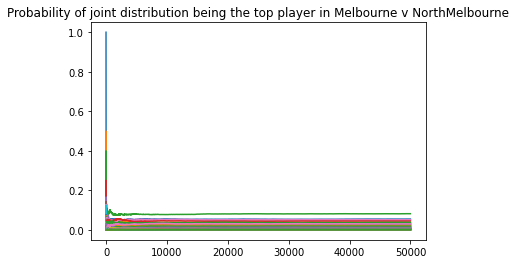

Probability of being the first combo in Adelaide v WesternBulldogs is 0.2 after 10 samples, 6 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.08 after 100 samples, 16 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.069 after 1000 samples, 47 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.0775 after 10000 samples, 58 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.07885 after 20000 samples, 66 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.07806666666666667 after 30000 samples, 66 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.078975 after 40000 samples, 67 pos prob instances, 4
Probability of being the first combo in Adelaide v WesternBulldogs is 0.07914 after 50000 samples, 67 pos prob instances, 4


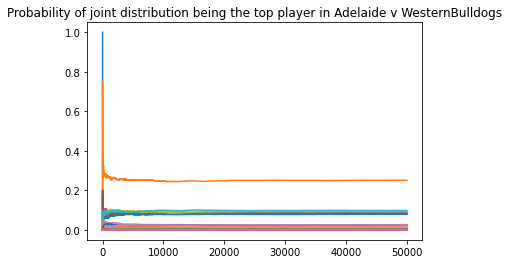

In [11]:
def simulation_stability_joint(round_number, team1, team2, n_samples, all_games_simulation, **kwargs):

    player_prob = dd(list)

    game_interested_players_index = {}
    n = 0
    for player in all_games_simulation[round][game][0]:
        if player in interested_players:
            game_interested_players_index[player] = n
            n += 1

    total = dd(int)

    for i in range(n_samples):

        combo = []
        for player in game_interested_players_index:
            rank = all_games_simulation[round][game][i].index(player)
            rank = rank if rank < 3 else 3
            combo.append((player, 3-rank))
        total[tuple(combo)] += 1

        if tuple(combo) not in player_prob:
            player_prob[tuple(combo)] = [0 for _ in range(i)]
        player_prob[tuple(combo)].append(total[tuple(combo)]/(i+1))

        for other_combo in player_prob:
            if other_combo != tuple(combo):
                player_prob[tuple(other_combo)].append(
                    player_prob[tuple(other_combo)][-1] * i / (i+1))

        if i in [9, 99, 999, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999]:
            print(
                f'Probability of being the first combo in {team1} v {team2} is {total[list(total.keys())[0]]/(i+1)} after {i+1} samples, {len(total)} pos prob instances, {len(game_interested_players_index)}')

    plt.title(
        f'Probability of joint distribution being the top player in {team1} v {team2}')

    for combo in player_prob:
        plt.plot(player_prob[combo])
    plt.show()


for round in all_games_simulation:

    for game in all_games_simulation[round]:

        data = pd.read_csv(
            f'../presentables/raw_predicted_scores/{year}_{round}_{game}.csv')

        simulation_stability_joint(round, game.split(' v ')[0], game.split(
            ' v ')[1], n_samples, all_games_simulation)

# Simulate game

In [15]:
n_sample_season = 100000

In [16]:
season_distribution = dict()

for i in tqdm(range(n_samples)):

    player_tally = dd(int)

    for round in all_games_player_distributions:
        for game in all_games_player_distributions[round]:

            # categorical distribution sample
            sampled_combo = np.random.choice(
                range(len(all_games_player_distributions[round][game]['joint'])), p=list(all_games_player_distributions[round][game]['joint'].values()))

            sampled_votes = list(all_games_player_distributions[round][game]['joint'].keys())[
                sampled_combo]

            for player in sampled_votes:
                player_tally[player[0]] += player[1]

    # sort by votes
    player_tally = dict(sorted(player_tally.items(),
                        key=lambda x: x[1], reverse=True))

    season_distribution[i] = player_tally

100%|██████████| 50000/50000 [00:16<00:00, 3018.21it/s]


In [17]:
for i in range(n_samples):
    season_distribution[i] = dict(
        sorted(season_distribution[i].items(), key=lambda x: x[1], reverse=True))

In [18]:
season_distribution_df = pd.DataFrame(
    {i: season_distribution[i].keys() for i in range(n_samples)})

**Research: season stability**

# Odds

In [19]:
# get probabilities
winner_prob = season_distribution_df.iloc[0].value_counts(normalize=True)

In [20]:
# count the number of times each player is in the top 2
top_2 = season_distribution_df.iloc[0:2].stack().value_counts(normalize=True)*2

In [21]:
winner_odds = {player: np.round(
    (1-winner_prob[player])/winner_prob[player], 2) for player in winner_prob.index}
winner_odds

{'Nick Daicos': 2.01,
 'Marcus Bontempelli': 2.44,
 'Nic Newman': 3.16,
 'Jack Steele': 28.71,
 'George Hewett': 39.55,
 'Sam Walsh': 40.81,
 'Rowan Marshall': 41.74,
 'Jai Newcombe': 102.95,
 'Jack Sinclair': 192.05,
 'Luke D-Uniacke': 266.38,
 'Harry Sheezel': 339.14,
 'Dylan Moore': 356.14,
 'Max Gawn': 489.2,
 'Tom De Koning': 631.91,
 'Matt Rowell': 723.64,
 'Jordan Dawson': 960.54,
 'Adam Treloar': 1665.67,
 'Tristan Xerri': 2776.78,
 'Noah Anderson': 12499.0,
 'Sam Flanders': 24999.0,
 'Rory Laird': 49999.0}

In [41]:
top2_odds = {player: np.round(
    (1-top_2[player])/top_2[player], 2) for player in top_2.index}
top2_odds

{'Noah Anderson': 0.28,
 'Zak Butters': 2.64,
 'Patrick Cripps': 6.89,
 'Jordan Dawson': 6.96,
 'Josh Dunkley': 9.69,
 'Charlie Curnow': 10.23,
 'Luke D-Uniacke': 13.4,
 'Lachie Neale': 15.27,
 'Connor Rozee': 18.73,
 'Harry McKay': 20.51,
 'Nick Daicos': 29.46,
 'Joe Daniher': 31.44,
 'Jack Sinclair': 31.97,
 'Rowan Marshall': 36.66,
 'Oliver Wines': 47.45,
 'Nic Newman': 50.15,
 'Rory Laird': 50.18,
 'Zachary Merrett': 50.89,
 'Jai Newcombe': 50.89,
 'Matt Rowell': 51.83,
 'Hugh McCluggage': 60.27,
 'Errol Gulden': 71.52,
 'Christian Petracca': 160.03,
 'Andrew Brayshaw': 217.34,
 'Tom De Koning': 1051.63,
 'Dylan Moore': 1922.08,
 'Luke Jackson': 1959.78,
 'Jesse Hogan': 1999.0,
 'Sam Walsh': 2940.18,
 'Brodie Grundy': 3029.3,
 'Chad Warner': 4999.0,
 'Jordan Clark': 5881.35,
 'Jeremy Cameron': 12499.0,
 'Jack Steele': 33332.33,
 'Luke Ryan': 49999.0}

****
- dynamic programming

- live input

**ODDS**
- number of votes 